In [24]:
# Heart Attack Risk Prediction
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline


In [25]:
df = pd.read_csv("../datasets/Heart-Attack-Risk.csv")

df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [26]:
df.notna().sum()

Patient ID                         8763
Age                                8763
Sex                                8763
Cholesterol                        8763
Blood Pressure                     8763
Heart Rate                         8763
Diabetes                           8763
Family History                     8763
Smoking                            8763
Obesity                            8763
Alcohol Consumption                8763
Exercise Hours Per Week            8763
Diet                               8763
Previous Heart Problems            8763
Medication Use                     8763
Stress Level                       8763
Sedentary Hours Per Day            8763
Income                             8763
BMI                                8763
Triglycerides                      8763
Physical Activity Days Per Week    8763
Sleep Hours Per Day                8763
Country                            8763
Continent                          8763
Hemisphere                         8763


In [27]:
df.count()

Patient ID                         8763
Age                                8763
Sex                                8763
Cholesterol                        8763
Blood Pressure                     8763
Heart Rate                         8763
Diabetes                           8763
Family History                     8763
Smoking                            8763
Obesity                            8763
Alcohol Consumption                8763
Exercise Hours Per Week            8763
Diet                               8763
Previous Heart Problems            8763
Medication Use                     8763
Stress Level                       8763
Sedentary Hours Per Day            8763
Income                             8763
BMI                                8763
Triglycerides                      8763
Physical Activity Days Per Week    8763
Sleep Hours Per Day                8763
Country                            8763
Continent                          8763
Hemisphere                         8763


In [28]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [29]:
df.tail

<bound method NDFrame.tail of      Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
0       BMW7812   67    Male          208         158/88          72   
1       CZE1114   21    Male          389         165/93          98   
2       BNI9906   21  Female          324         174/99          72   
3       JLN3497   84    Male          383        163/100          73   
4       GFO8847   66    Male          318          91/88          93   
...         ...  ...     ...          ...            ...         ...   
8758    MSV9918   60    Male          121          94/76          61   
8759    QSV6764   28  Female          120        157/102          73   
8760    XKA5925   47    Male          250         161/75         105   
8761    EPE6801   36    Male          178         119/67          60   
8762    ZWN9666   25  Female          356         138/67          75   

      Diabetes  Family History  Smoking  Obesity  ...  \
0            0               0        1        0

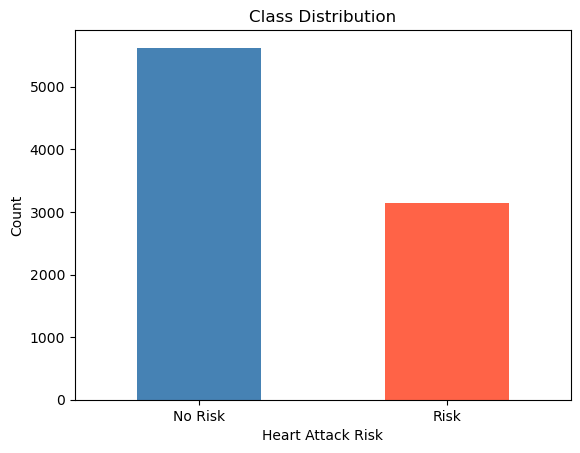

In [30]:
df['Heart Attack Risk'].value_counts().plot(kind='bar', color=['steelblue', 'tomato'])
plt.xticks([0, 1], ['No Risk', 'Risk'], rotation=0)
plt.title('Class Distribution')
plt.ylabel('Count')
plt.show()

In [31]:
df = df.dropna()
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure"].str.split("/", expand=True).astype(int)
df = df.drop("Blood Pressure", axis=1)
df["Sex"] = df["Sex"].map({"Male": 0, "Female": 1})
df["Diet"] = df["Diet"].map({"Healthy": 0, "Average": 1, "Unhealthy": 2})
X = df.drop(["Patient ID", "Heart Attack Risk", "Country", "Continent", "Hemisphere"], axis=1)
y = df["Heart Attack Risk"]



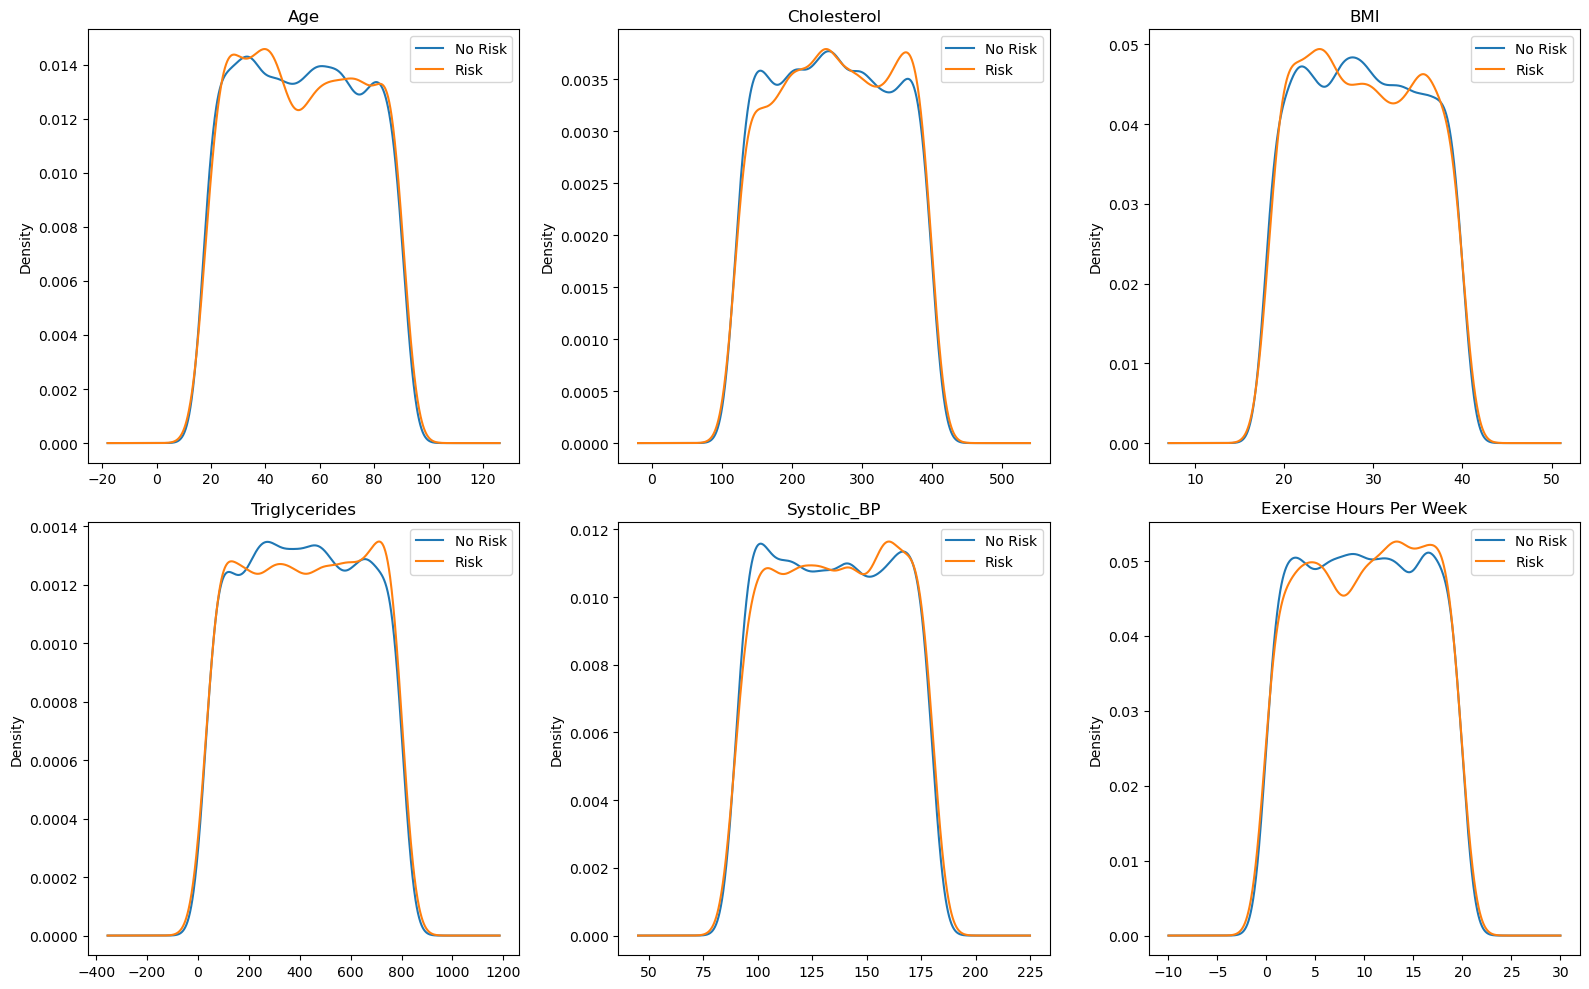

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
features = ['Age', 'Cholesterol', 'BMI', 'Triglycerides', 'Systolic_BP', 'Exercise Hours Per Week']

for ax, feat in zip(axes.flatten(), features):
    df.groupby('Heart Attack Risk')[feat].plot(kind='kde', ax=ax, legend=True)
    ax.set_title(feat)
    ax.legend(['No Risk', 'Risk'])

plt.tight_layout()
plt.show()

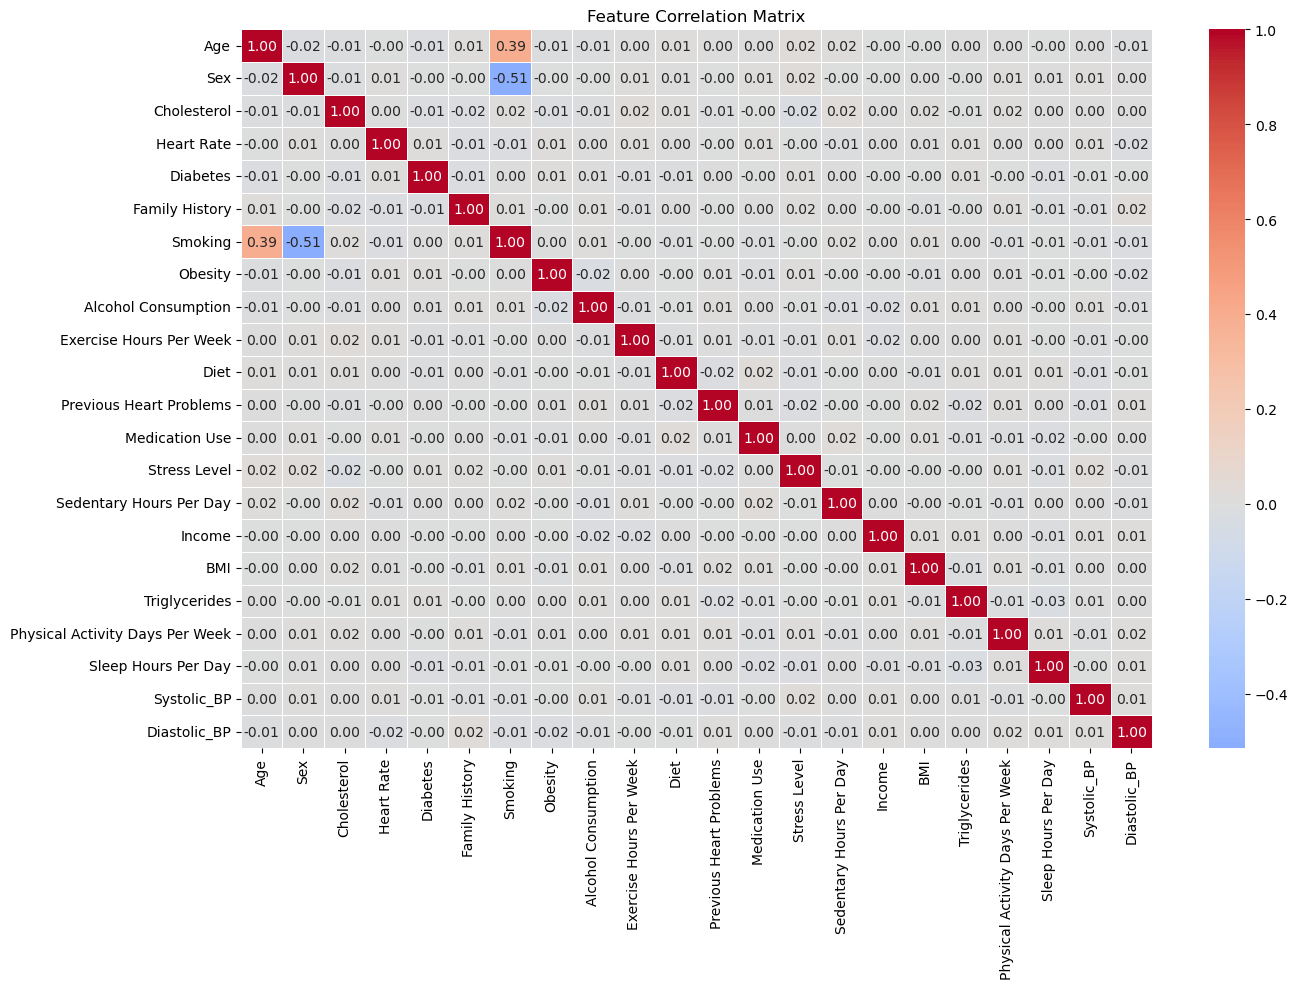

In [33]:
plt.figure(figsize=(14, 10))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [34]:
df['Heart Attack Risk'].value_counts()

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [36]:

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        C=1,
        class_weight='balanced',
        max_iter=1000,
        penalty='l1',
        solver='liblinear',
        random_state=42
    ))
])

logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)
y_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



/opt/anaconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
X.select_dtypes(exclude="number").columns.tolist()

[]

In [38]:

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(
        C=0.01,
        class_weight='balanced',
        max_iter=1000,
        penalty='l1',
        solver='liblinear',
        random_state=42
    ))
])

logreg_pipeline.fit(X_train, y_train)
y_pred = logreg_pipeline.predict(X_test)
y_pred_proba = logreg_pipeline.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      1125
           1       0.35      0.54      0.43       628

    accuracy                           0.48      1753
   macro avg       0.49      0.49      0.47      1753
weighted avg       0.53      0.48      0.49      1753



In [39]:


# model = LogisticRegression(
#     C=0.001,
#     class_weight='balanced',
#     max_iter=1000,
#     penalty='l1',
#     solver='liblinear'
# )
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)

In [40]:
logreg_pipeline.predict_proba(X_test)

array([[0.49988319, 0.50011681],
       [0.49976652, 0.50023348],
       [0.50023322, 0.49976678],
       ...,
       [0.50023322, 0.49976678],
       [0.50011654, 0.49988346],
       [0.49988319, 0.50011681]])

In [41]:
y_pred = logreg_pipeline.predict(X_test)
y_pred_proba = logreg_pipeline.predict_proba(X_test)[:,1]

In [42]:
logreg_pipeline.score(X_test, y_test)

0.4791785510553337

In [43]:
from sklearn.metrics import classification_report

y_pred = logreg_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52      1125
           1       0.35      0.54      0.43       628

    accuracy                           0.48      1753
   macro avg       0.49      0.49      0.47      1753
weighted avg       0.53      0.48      0.49      1753



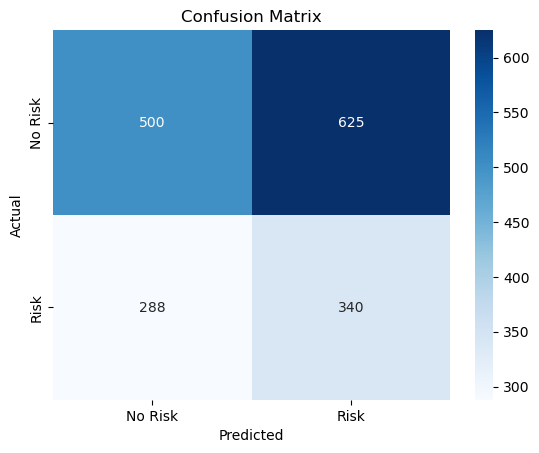

In [44]:


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Risk", "Risk"],
            yticklabels=["No Risk", "Risk"])

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

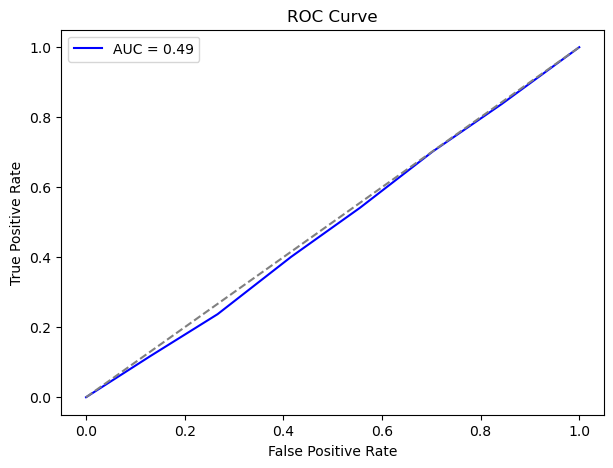

In [45]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

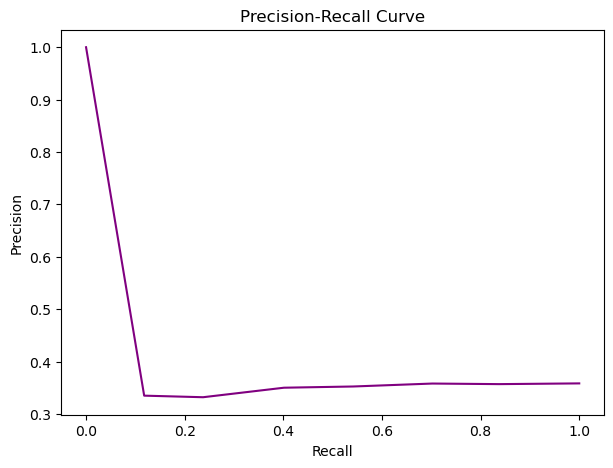

In [46]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(7, 5))
plt.plot(recall, precision, color="purple")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()